## Loading Datsets

In [1]:
import os
from nltk import word_tokenize
import pandas as pd
import numpy as np

In [2]:
# OS library walk function iterates directories 
rootdir = r" FILL DATA DIRECTORY "

for directories, subdirs, files in os.walk(rootdir):
    print(directories, subdirs, len(files))

C:\Users\tolga\Desktop\makina öğrenmesi\makina öğrenmesi\ENRON SPAM\ENRON SPAM\data ['enron1', 'enron2', 'enron3', 'enron4', 'enron5', 'enron6'] 7
C:\Users\tolga\Desktop\makina öğrenmesi\makina öğrenmesi\ENRON SPAM\ENRON SPAM\data\enron1 ['ham', 'spam'] 2
C:\Users\tolga\Desktop\makina öğrenmesi\makina öğrenmesi\ENRON SPAM\ENRON SPAM\data\enron1\ham [] 3672
C:\Users\tolga\Desktop\makina öğrenmesi\makina öğrenmesi\ENRON SPAM\ENRON SPAM\data\enron1\spam [] 1500
C:\Users\tolga\Desktop\makina öğrenmesi\makina öğrenmesi\ENRON SPAM\ENRON SPAM\data\enron2 ['ham', 'spam'] 1
C:\Users\tolga\Desktop\makina öğrenmesi\makina öğrenmesi\ENRON SPAM\ENRON SPAM\data\enron2\ham [] 4361
C:\Users\tolga\Desktop\makina öğrenmesi\makina öğrenmesi\ENRON SPAM\ENRON SPAM\data\enron2\spam [] 1496
C:\Users\tolga\Desktop\makina öğrenmesi\makina öğrenmesi\ENRON SPAM\ENRON SPAM\data\enron3 ['ham', 'spam'] 1
C:\Users\tolga\Desktop\makina öğrenmesi\makina öğrenmesi\ENRON SPAM\ENRON SPAM\data\enron3\ham [] 4012
C:\Users\

In [3]:
ham_list = [] # empty ham list
spam_list = [] # empty spam list

for directories, subdirs, files in os.walk(rootdir):
    if (os.path.split(directories)[1]  == 'ham'):
        for filename in files:      
            # Opening ham folders and appending ham emails from the folder into the ham_list
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                text = f.read()
                ham_list.append(text)

    if (os.path.split(directories)[1]  == 'spam'):
       for filename in files:      
            # Opening spam folders and appending spam emails from the folder into the spam_list
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                text = f.read()
                spam_list.append(text)

spam_ones = [1] * len(spam_list); # making empty list of ones
ham_zeros = [0] * len(ham_list); # making empty list of zeros

# Creating dataframe using pandas, dataframe has the email content and 1 in spam column if email is spam or zero if not spam
dfSpam = pd.DataFrame(
    {'Spam': spam_ones,
    'Email': spam_list
    })
dfHam = pd.DataFrame(
    {'Spam': ham_zeros,
    'Email': ham_list
    })

dfTotal = pd.concat([dfHam, dfSpam])
dfTotal.head(10)

,Spam,Email
0,0,Subject: christmas tree farm pictures\n
1,0,"Subject: vastar resources , inc .\ngary , prod..."
2,0,Subject: calpine daily gas nomination\n- calpi...
3,0,Subject: re : issue\nfyi - see note below - al...
4,0,Subject: meter 7268 nov allocation\nfyi .\n- -...
5,0,"Subject: mcmullen gas for 11 / 99\njackie ,\ns..."
6,0,"Subject: meter 1517 - jan 1999\ngeorge ,\ni ne..."
7,0,Subject: duns number changes\nfyi\n- - - - - -...
8,0,Subject: king ranch\nthere are two fields of g...
9,0,Subject: re : entex transistion\nthanks so muc...


In [4]:
# Randomizing dataframe so classifier is not biased, Resetting indexes for the dataframe, replacing number occurences 
from sklearn.utils import shuffle

dfTotal = shuffle(dfTotal,random_state=0)
dfTotal = dfTotal.reset_index(drop=True);
dfTotal = dfTotal.replace('\d+', 'and', regex=True)
dfTotal.head(10)

,Spam,Email
0,0,"Subject: gmt . inc .\ntom ,\nplease create a s..."
1,1,Subject: what car will you buy bait - excelled...
2,0,Subject: ferc orders on ca and rto west\n- - -...
3,0,Subject: reviews\nheather will be calling each...
4,1,Subject: sshs . . get low cost software cds or...
5,1,Subject: our pro - forma invoice attached\nund...
6,1,Subject: top - quality prescripiton drvgs\nred...
7,1,Subject: re : paliourg home info you requested...
8,0,Subject: start date : and / and / and ; hourah...
9,1,Subject: award notification ( file for claim )...


## Training test split

In [5]:
# dividing dataset into training and testing split

from sklearn.model_selection import train_test_split

# split 70% train, 30% test

email_train,email_test,spam_train,spam_test = train_test_split(dfTotal.Email,dfTotal.Spam,test_size=0.3,random_state=0)

# 70% * 1/3.5 = 20% #validation split 
#email_train,email_val,spam_train,spam_val = train_test_split(email_tv,spam_tv,test_size=(1/3.5),random_state=0)

In [6]:
email_train.head(10)

3309     Subject: brand name and generic pills\ndiphtho...
772      Subject: sennse\nhow to save on your medlcatio...
11994    Subject: looking for cheap high - quality soft...
323      Subject: ! click here ! how to legally access ...
29489    Subject: re : rotational opportunities within ...
27816    Subject: let us fill your p [ rescriptions ! t...
9403     Subject: localized software , all languages av...
798      Subject: re : one more thing\nclayton ,\ni agr...
24661    Subject: weekly deal report\nattched is the we...
1295     Subject: talebearer symanntec , pc games , mac...
Name: Email, dtype: object

In [7]:
email_test.head(10)

169      Subject: seven day cruise for two with any clo...
33147    Subject: re : pserc industrial advisory board ...
8603     Subject: re : wip report for week and / and / ...
2481     Subject: houston visit and baby pictures\nsall...
28064    Subject: re : confusion around treasury workst...
19849    Subject: dinner for summer interns\nvince ,\nt...
20220    Subject: meter and , and / and\ndaren - i need...
22441    Subject: tw current rate matrix\nthought you c...
13215    Subject: moving forward\nhi there -\nhope you ...
20009    Subject: vehicle accidents - alert\nas you kno...
Name: Email, dtype: object

In [8]:
#bag of words on training set for both spam & ham
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

# add additional email stop words
email_stop_words = ['subject','cc']
stop_words = text.ENGLISH_STOP_WORDS.union(email_stop_words)

cv = CountVectorizer(analyzer='word',stop_words=stop_words, min_df = 2, max_df = 1.0);

email_train_dtm = cv.fit_transform(email_train)

In [9]:
# Converting countVectorizer Dataframe to TF-IDF object

from sklearn.feature_extraction.text import TfidfTransformer
tf = TfidfTransformer()
email_train_tf = tf.fit_transform(email_train_dtm)

In [10]:
email_train_tf

<23601x63313 sparse matrix of type '<class 'numpy.float64'>'
	with 1880747 stored elements in Compressed Sparse Row format>

## Exploratory analysis on the data

totalSpam = dfTotal.loc[dfTotal.Spam == 1]
totalHam = dfTotal.loc[dfTotal.Spam == 0]

trainingSpam = email_train.loc[spam_train.values == 1]
trainingHam = email_train.loc[spam_train.values == 0]

valSpam = email_val.loc[spam_val.values == 1]
valHam = email_val.loc[spam_val.values == 0]

testSpam = email_test.loc[spam_test.values == 1]
testHam = email_test.loc[spam_test.values == 0]

print("There are "+ str(len(totalSpam))+" total spam emails.");
print("There are "+ str(len(totalHam))+" total ham emails.");
print("There are "+ str(len(trainingSpam))+" training spam emails.");
print("There are "+ str(len(trainingHam))+" training ham emails.");
print("There are "+ str(len(valSpam))+" validation spam emails.");
print("There are "+ str(len(valHam))+" validation ham emails.");
print("There are "+ str(len(testSpam))+" test spam emails.");
print("There are "+ str(len(testHam))+" test ham emails.");

# Seperate Bag of words instances in files as rows, with words as columns
cv_spam = CountVectorizer(analyzer='word',stop_words=stop_words, min_df = 2, max_df = 1.0);
cv_ham = CountVectorizer(analyzer='word',stop_words=stop_words, min_df = 2, max_df = 1.0);

fit_spam = cv_spam.fit(trainingSpam)
fit_ham = cv_ham.fit(trainingHam)

train_spam = cv_spam.transform(trainingSpam)
train_ham = cv_ham.transform(trainingHam)

# Relative frequency of words, pandas series
pdSpam = pd.DataFrame(train_spam.toarray(),columns=fit_spam.get_feature_names())
pdHam = pd.DataFrame(train_ham.toarray(),columns=fit_ham.get_feature_names())

pdSpam = pdSpam.mean()
pdHam = pdHam.mean()

# Convert from series to data frame
pdSpam = pd.DataFrame({'Word':pdSpam.index, 'Frequency':pdSpam.values})
pdHam =  pd.DataFrame({'Word':pdHam.index,  'Frequency':pdHam.values})

pdHam = pdHam.sort_values('Frequency',ascending=0) #sort desceding
pdSpam = pdSpam.sort_values('Frequency',ascending=0) #sort desceding

HamTop30 = pdHam.iloc[:30]
SpamTop30 = pdSpam.iloc[:30]
print("\nTop 30 Spam Words:\n", SpamTop30)
print("\nTop 30 Ham Words:\n", HamTop30)

# select frequency of individual words
selector = (pdHam.Word == 'fraud')
print(pdHam.Frequency[selector])


 print("\nSpam\n",trainingSpam.str.len().describe())
print("\n\nHam\n",trainingHam.str.len().describe())

import seaborn as sns

sns.barplot(x='Word',y='Frequency',data=SpamTop30[:5]).set_title('Spam Top 5')

sns.barplot(x='Word',y='Frequency',data=HamTop30[:5]).set_title('Ham Top 5')

EmailLen = email_train.str.len()
index = EmailLen.index
DFEmailLen = pd.DataFrame({'Length':EmailLen.values, 'Spam':spam_train.values}, index=index)
EmailLen = pd.concat([email_train,DFEmailLen], axis=1)
EmailLen.tail(10)

sns.boxplot(x='Spam',y='Length',data=EmailLen)

import matplotlib.pyplot as plt
plt.ylim(0, 4000)
sns.boxplot(x='Spam',y='Length',data=EmailLen)

### Initial classfiers

In [11]:
# dtm/BOW setup for 
email_test_dtm = cv.transform(email_test)
# convert to TFIDF form
email_test_tf = tf.fit_transform(email_test_dtm)
email_test_tf

<10115x63313 sparse matrix of type '<class 'numpy.float64'>'
	with 779918 stored elements in Compressed Sparse Row format>

## ABC (Artifical Bee Colony) Optimizer

In [22]:
from Hive import Hive
from Hive import Utilities
from sklearn.metrics import log_loss

"""
Needs an evaluator function for every model we are going to use.
Evaluator function should return a value based on the parameters given
and the optimizer will try to minimize this value by changing parameter values
between the boundaries defined.

"""

# ---- SOLVE TEST CASE WITH ARTIFICIAL BEE COLONY ALGORITHM

def run(lowBounds,upBounds,evaluator):
    """
    lower = Lower boundary value for a param
    upper = Upper boundary value for a param
    fun = evaluator function that optimizer will find the minimum of between out boundaries.
    numb_bees = Number of units in search space. (More units -> Longer it takes)
    max_itrs = Maximum number of iterations to find the best solution.
    """
    model = Hive.BeeHive(lower = lowBounds, # MUST BE A LIST !
                         upper = upBounds , # MUST BE A LIST ! 
                         fun       = evaluator ,
                         numb_bees =  100       ,
                         max_itrs  =  2       ,)

    # runs model
    cost,sol = model.run()

    # plots convergence
    Utilities.ConvergencePlot(cost)

    # prints out best solution
    print("Fitness Value ABC: {0}".format(model.best))
    ABC_model = MultinomialNB(alpha=10**sol[0]).fit(email_train_tf,spam_train) # Create the optimized model with best parameter
    result = ABC_model.predict(email_test_tf) # predict with the ABC_model
    return sol,result


## Optunity

In [16]:
import optunity
import optunity.metrics

"""
See the documentation for more info : https://optunity.readthedocs.io/en/latest/
"""

'\nSee the documentation for more info : https://optunity.readthedocs.io/en/latest/\n'

### Naive Bayes

In [4]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.get_params()
# fit tf-idf representation to NB model
#nb.fit(email_train_tf, spam_train)

# class predictions for testing set
#result1 = nb.predict(email_test_tf)


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

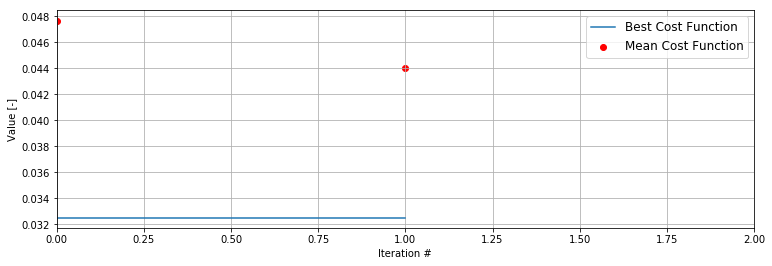

Fitness Value ABC: 0.03250306724051089


In [23]:
def evaluator(params):
    """
    Parameters of this function can be made as many as we want. Just be careful to 
    set parameters in order with respect to boundaries you defined at initialization.
    """
    nBayes = MultinomialNB(alpha=10**params[0]).fit(email_train_tf,spam_train)
    
    """
    Using accuracy as the value to be minimized. Delete the hashtags to use it.
    See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics 
    for more loss functions.
    """
    #score = nBayes.score(email_test_tf,spam_test)
    #return (1-score)
    """
    Using log_loss as the value to be minimized.
    """
    pred_proba = nBayes.predict_proba(email_test_tf)
    return log_loss(spam_test,pred_proba)
    

sol,result3 = run([-2],[1],evaluator)

In [25]:
@optunity.cross_validated(x=email_train_tf, y=spam_train.values, num_folds=5, num_iter=2)
def nb_auc(x_train, y_train, x_test, y_test, logA):
    """
    Sample function for optunity to minimize using PSO.
    We are using optunity's roc_auc function to get a value to minimize.
    """
    model = MultinomialNB(alpha=10 ** logA).fit(x_train, y_train) 
    pred = model.predict(x_test)
    return optunity.metrics.roc_auc(y_test, pred)

# perform tuning
hps, _, _ = optunity.maximize(nb_auc, num_evals=10, logA=[-2, -1])

# train model on the full training set with tuned hyperparameters
optimal_model = MultinomialNB(alpha=10**hps['logA']).fit(email_train_tf, spam_train)

result2 = optimal_model.predict(email_test_tf)

In [26]:
from sklearn import metrics

print("Accuracy on test set:")
print(metrics.accuracy_score(spam_test, result1))
print("Accuracy on test set with PSO:")
print(metrics.accuracy_score(spam_test, result2))
print("Accuracy on test set with ABC:")
print(metrics.accuracy_score(spam_test, result3))
optimal_model.alpha

Accuracy on test set:
0.9882352941176471
Accuracy on test set with PSO:
0.9891250617894216
Accuracy on test set with ABC:
0.9892239248640633


0.043567250849436905

In [14]:
## Tuned NB
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-2, 2, 100) }
clf = GridSearchCV(MultinomialNB(), param_grid)
clf.fit(email_train_tf, spam_train)
best_alpha = clf.best_estimator_.alpha
print(" Best score: ", clf.best_score_ )
print("alpha hyperparameter for best score: ", best_alpha)

c:\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 Best score:  0.9886021778738189
alpha hyperparameter for best score:  0.023101297000831605


In [15]:
TunedNB = MultinomialNB(alpha = 0.008111308307896872)

In [16]:
TunedNB.fit(email_train_tf, spam_train)

MultinomialNB(alpha=0.008111308307896872, class_prior=None, fit_prior=True)

In [17]:
result1a = TunedNB.predict(email_test_tf)

In [18]:
from sklearn import metrics

print("Accuracy on test set:")
print(metrics.accuracy_score(spam_test, result1a))

Accuracy on test set:
0.9891250617894216


## SVM

In [20]:
from sklearn.svm import SVC
import optunity
import optunity.metrics
import sklearn.svm

In [ ]:
"""
Takes too long for SVM to optimize with PSO. Not Recommended.

"""
# score function: twice iterated 5-fold cross-validated accuracy
@optunity.cross_validated(x=email_train_tf, y=spam_train.values, num_folds=5, num_iter=2)
def svm_auc(x_train, y_train, x_test, y_test, logC, logGamma):
    model = sklearn.svm.SVC(C=10 ** logC, gamma=10 ** logGamma).fit(x_train, y_train) 
    decision_values = model.decision_function(x_test) 
    return optunity.metrics.roc_auc(y_test, decision_values)

# perform tuning
hps, _, _ = optunity.maximize(svm_auc, num_evals=1, logC=[-1, 2], logGamma=[-1, 1])

# train model on the full training set with tuned hyperparameters
optimal_model = sklearn.svm.SVC(C=10 ** hps['logC'], gamma=10 ** hps['logGamma']).fit(email_train_tf, spam_train) # setting the optimal model

result2 = optimal_model.predict(spam_test)

In [ ]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
#fit tf-idf representation to NB model
clf.fit(email_train_tf, spam_train)

# class predictions for testing set
result1 = clf.predict(email_test_tf)


In [ ]:
def evaluator(params):
    """
    Parameters of this function can be made as many as we want. Just be careful to 
    set parameters in order with respect to boundaries you defined at initialization.
    """
    svm = sklearn.svm.SVC(C=10 ** logC, gamma=10 ** logGamma).fit(x_train, y_train)
    return svm.score(email_test_tf,spam_test)
    

sol,result3 = run([-1,-1],[2,1],evaluator)

In [ ]:
from sklearn import metrics

print("Accuracy on test set:")
print(metrics.accuracy_score(spam_test, result1))
print("Accuracy on test set with PSO:")
print(metrics.accuracy_score(spam_test, result2))
print("Accuracy on test set with ABC:")
print(metrics.accuracy_score(spam_test, result3))


### Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# fit tf-idf representation to NB model
clf.fit(email_train_tf, spam_train)

# class predictions for testing set
result1 = clf.predict(email_test_tf)

In [ ]:
def evaluator(params):
    """
    Parameters of this function can be made as many as we want. Just be careful to 
    set parameters in order with respect to boundaries you defined at initialization.
    """
    model = LogisticRegression(C=10 ** logC).fit(x_train, y_train)
    return svm.score(email_test_tf,spam_test)
    

sol,result3 = run([-2],[2],evaluator)

In [ ]:
def lr_auc(x_train, y_train, x_test, y_test, logC):
    model = LogisticRegression(C=10 ** logC).fit(x_train, y_train) 
    pred = model.predict(x_test)
    return optunity.metrics.roc_auc(y_test, pred) # using roc_auc as the fitness of model, PSO will find the maximum of this func.
# perform tuning
hps, _, _ = optunity.maximize(lr_auc, num_evals=10, logC=[-2, 2]) # increase num_evals for better optimization

# train model on the full training set with tuned hyperparameters
optimal_model = LogisticRegression(C=10**hps['logC']).fit(email_train_tf, spam_train)

result2 = optimal_model.predict(email_test_tf)

In [39]:
from sklearn import metrics

print("Accuracy on test set:")
print(metrics.accuracy_score(spam_test, result1))
print("Accuracy on test set with PSO:")
print(metrics.accuracy_score(spam_test, result2))
print("Accuracy on test set with ABC:")
print(metrics.accuracy_score(spam_test, result3))

Accuracy on test set:
0.9854671280276817
Accuracy on test set:
0.9908057340583292


20.90800041278718

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# fit tf-idf representation to NB model
clf.fit(email_train_tf, spam_train)

# class predictions for testing set
result1 = clf.predict(email_test_tf)

c:\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
def evaluator(params):
    """
    Parameters of this function can be made as many as we want. Just be careful to 
    set parameters in order with respect to boundaries you defined at initialization.
    """
    model = RandomForestClassifier(min_weight_fraction_leaf=params[0]).fit(x_train, y_train)
    return model.score(email_test_tf,spam_test)
    

sol,result3 = run([0],[1],evaluator)

In [58]:
"""
For the optimization of parameters such as n_estimators and max_depth, GridSearchCV function of 
sklearn should be used because PSO might return float values and it would be unefficient for us 
to use these float values by converting them to integers. So PSO function below should be implemented
on parameters that can take float values.

Despite the fact that estimator optimizing takes a lot of time even 1 evaluation of PSO increases
the accuracy of model by 1%.

Estimator Optimizing:

def rf_auc(x_train, y_train, x_test, y_test, nEst):
    model = RandomForestClassifier(n_estimators = int(nEst)).fit(x_train, y_train) 
    pred = model.predict(x_test)
    return optunity.metrics.roc_auc(y_test, pred) # using roc_auc as the fitness of model, PSO will find the maximum of this func.
# perform tuning
hps, _, _ = optunity.maximize(rf_auc, num_evals=1, nEst=[10,200]) # increase num_evals for better optimization

# train model on the full training set with tuned hyperparameters
optimal_model = RandomForestClassifier(n_estimators=int(hps['nEst'])).fit(email_train_tf, spam_train)

"""

def rf_auc(x_train, y_train, x_test, y_test, MWFL):
    model = RandomForestClassifier(min_weight_fraction_leaf=MWFL).fit(x_train, y_train)
    pred = model.predict(x_test)
    return optunity.metrics.roc_auc(y_test, pred) # using roc_auc as the fitness of model, PSO will find the maximum of this func.
# perform tuning
hps, _, _ = optunity.maximize(rf_auc, num_evals=20, MWFL=[0,1]) # increase num_evals for better optimization

# train model on the full training set with tuned hyperparameters
optimal_model = RandomForestClassifier(min_weight_fraction_leaf=hps['MWFL']).fit(email_train_tf, spam_train)

result2 = optimal_model.predict(email_test_tf)

In [59]:
from sklearn import metrics

print("Accuracy on test set:")
print(metrics.accuracy_score(spam_test, result1))
print("Accuracy on test set with PSO:")
print(metrics.accuracy_score(spam_test, result2))
print("Accuracy on test set with ABC:")
print(metrics.accuracy_score(spam_test, result3))

Accuracy on test set:
0.975976272862086
Optimized model's accuracy on test set:
0.986950074147306


### K neighbours classifier

In [49]:
"""
KNN doesn't have any float taking parameters that evolutionary algorithms
might optimize.
"""

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
# fit tf-idf representation to NB model
neigh.fit(email_train_tf, spam_train)


# class predictions for testing set
result1 = neigh.predict(email_test_tf)

In [50]:
from sklearn import metrics

print("Accuracy on test set:")
print(metrics.accuracy_score(spam_test, result1))

Accuracy on test set:
0.9816933638443935
